# K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib notebook

## Data generation

Generate a toy data set of `n` samples.

Each data point should have 2 features. The data points are generated by drawing from `k` **2D** Gaussian distributions (the `k` "clusters") with the identity matrix as covariance matrix. Each cluster should roughly contain the same number of points.

The `k` centers of the clusters, i.e. the mean points of the Gaussian distribution, should be random integers in each dimension that are drawn from a uniform distribution in the range -10 to 10.

In [2]:
# Have a look at the documentation of numpy.random to find appropriate functions for this task.
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    ==================== =========================================================
    Utility functions
    random_sample        Uniformly distributed floats over ``[0, 1)``.
    random               Alias for `random_sample`.
    bytes                Uniformly distributed random bytes.
    random_integers      Uniformly distributed integers in a given range.
    permutation          Randomly permute a sequence / generate a random sequence.
    shuffle              Randomly permute a sequence in place.
    seed                 Seed the random number generator.
    choice               Random sample from 1-D array.
    
    ==================== =========================================================
    
    ==================== =========================================================
    Compatibility functions
    rand                 Uniformly distributed values.
    randn

In [3]:
def generate_data(n, k):
    """
    :param n: Number of samples.
    :param k: Number of clusters.
    :return X: The data points stored in a (n x 2) numpy.ndarray.
    :return centers: The cluster centers stored in a (k x 2) numpy.ndarray.
    """
    centers = np.random.randint(-10,10,k*2).reshape(-1,2)
    clusters = []
    X = []
    for center in centers:
        c = np.random.multivariate_normal(center, np.eye(2), n // k)
        clusters.append(c)
    X = np.concatenate(clusters, axis=0)
    
    return X, centers
np.random.seed(42)  # Set the seed of the random number generator to be able to reproduce the results.

# Generate a dataset of 1000 samples and 4 clusters
X, true_centers = generate_data(1000, 4)

Plot the dataset in a scatter plot.

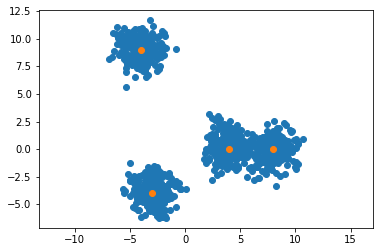

In [4]:
plt.figure()

_ = plt.scatter(X[:,0],X[:,1])
_ = plt.scatter(true_centers[:,0],true_centers[:,1])
plt.axis('equal')

plt.show()

## Distances
Implement the L1, L2 and cosine distances between the arrays x and y.

In [10]:
# Implement distances using Numpy
def l1(x, y): #manhattan
    distance = np.abs(x[:,0,None] - y[:,0]) + np.abs(x[:,1,None] - y[:,1])

    return distance
    
def l2(x, y): #euclidiean
    distance = np.linalg.norm(x-y)

    return distance
    
def cosine_distance(x, y):
    distance = np.dot(x, y)/(np.linalg.norm(x)*np.linalg.norm(y))

    return distance

## Initialization
Initialize the cluster prototypes. The parameter `method` indicates how the initialization should be performed. Possible values are:
* `"random"`: Initialize randomly between 0 and 5 (integers from uniform distribution).
* `"sample"`: Randomly choose samples from the dataset as initialization. *Hint*: `sklearn.utils.shuffle` might be helpful.
* `"zero"`: Initialize all prototypes to (0, 0)
* If none of these above values is provided, raise an appropriate Exception..

In [11]:
def initialize(k, X, method="sample"):
    """
    :param k: Number of clusters.
    :param X: Dataset.
    :return M_init: The initial guess of the cluster centers as (k x 2) numpy.ndarray.
    """
    centroids = []

    if(method=="random"):
        centroids = np.random.randint(5, size=(k,2))
    elif(method=="sample"):
        X_shuffled = shuffle(X, random_state=0)
        centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    elif("zero"):
        centroids = np.zeros((k, 2))
    else:
        raise ValueError('centroid was not initialized') 

    M_init = centroids
    return M_init

In [12]:
initialize(4, X)

array([[ 7.60601864, -0.41182615],
       [ 8.24919854,  0.42147345],
       [ 9.076372  ,  0.59235192],
       [-4.6462995 ,  8.59644504]])

## K-means Algorithm
Implement K-means. Stop the iteration if the estimated cluster do not change anymore (i.e. the sum of the change is less than `epsilon`) or the maximal number of iterations `max_iter` is reached. Use the function `distance` to compute the intra-class distances.

In [15]:
from copy import deepcopy
def kmeans(X, k, M_init, distance=l1, max_iter=100, epsilon=1e-2):
    """
    :param X: n x d data matrix
    :return M: k x 2 array of estimated cluster centers
    :return C: n x k binary array that defines the cluster memberships.
    """
    # Initialize codebook vectors
    centers_new = np.zeros(M_init.shape)
    centers = deepcopy(M_init)
    
    error = np.linalg.norm(centers_new - centers)
    
    cur_iter = 0
    while error != 0:
        if(cur_iter == 0):
            dist = distance(X,centers)
        else:
            dist = distance(X,centers_new)

        min_dist_cluster_index = np.argmin(dist,axis=1)
        centers = deepcopy(centers_new)
        for i in range(k):
            centers_new[i] = np.mean(X[min_dist_cluster_index == i], axis=0)

        error = np.linalg.norm(centers_new - centers)
        cur_iter += 1
        if max_iter < cur_iter:
            break
    
    M = centers_new

    index_cluster = np.zeros((X.shape[0],k))

    for i in range(len(index_cluster)):
        index_cluster[i][min_dist_cluster_index[i]] = 1
    
    C = index_cluster
        
    return M, C

In [14]:
# Run an example
k = 4
M_init = initialize(k, X, method="sample")
print("Initial centers:")
print(M_init)
M, C = kmeans(X, k, M_init, max_iter=10)

print("\n")
print("Result:")
print(M)

print("\n")
print("True centers:")
print(true_centers)

Initial centers:
[[-3.77992567  7.11611651]
 [ 3.12875312 -0.22674943]
 [-4.29353574 -2.9220461 ]
 [ 6.73310553  0.04425939]]


Result:
[[-4.07335817  9.01374675]
 [ 3.9969504   0.15977659]
 [-2.98281543 -3.87733455]
 [ 8.00203469 -0.0872959 ]]


True centers:
[[-4  9]
 [ 4  0]
 [-3 -4]
 [ 8  0]]


## Inspection

Plot the clustering result in a scatter plot. Samples belonging to the same cluster should have the same color. 

Furthermore, plot the initial guesses and the final estimates of the centroids. Use different markers to distinguish the from the samples in the scatter plot. To this end, have a look at the documentation of `plt.scatter`.

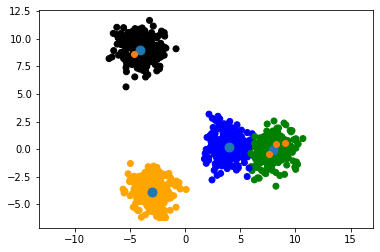

In [13]:
# Plot: color samples according to cluster
plt.figure()
colors=['orange', 'blue', 'green','black']
colors = np.array(colors)
collist = [colors[np.where( c ==1)][0] for c in C]

_ = plt.scatter(X[:,0],X[:,1], color = collist)
_ = plt.scatter(M[:,0],M[:,1], s = 80)
_ = plt.scatter(M_init[:,0],M_init[:,1])
plt.axis('equal')
plt.show()

## Number of Clusters
Try out a different number of k and plot the result. Run this for 5 runs to investigate the effect of randomness.

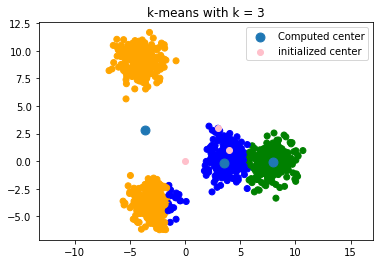

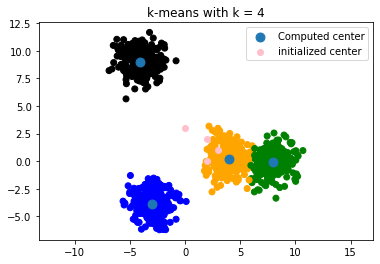

In [23]:
colors=['orange', 'blue', 'green','black','red']
colors = np.array(colors)
# Run an example

for i in range(3,5):
    plt.figure()
    k=5
    M_init = initialize(i, X, method="random")
    M, C = kmeans(X, i, M_init, max_iter=10)
    collist = [colors[np.where(c ==1)][0] for c in C]
    # >>>>> YOUR CODE HERE
    #for i in range(len(X)):
    _ = plt.scatter(X[:,0],X[:,1], color = collist)
    _ = plt.scatter(M[:,0],M[:,1],s = 80, label='Computed center')
    _ = plt.scatter(M_init[:,0],M_init[:,1],c = "pink", label='initialized center')
    plt.title('k-means with k = %i' %i)
    plt.legend()
    plt.axis('equal')    
    
    plt.show()

## Initialization
Try out the different initialization methods (3 runs each to investigate the effect of randomness). Comment on the results.

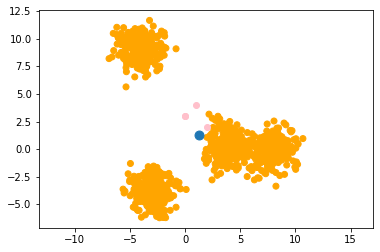

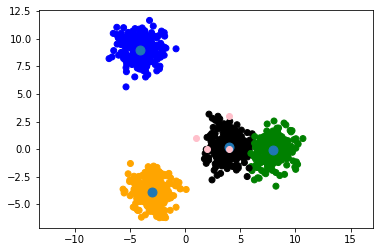

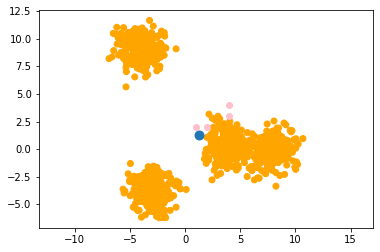

In [88]:
k = 4
num_runs = 3

colors=['orange', 'blue', 'green','black']
colors = np.array(colors)
# Run an example

for i in range(num_runs):
    plt.figure()
    M_init = initialize(k, X, method="random")
    M, C = kmeans(X, k, M_init, max_iter=10)
    collist = [colors[np.where(c ==1)][0] for c in C]
    _ = plt.scatter(X[:,0],X[:,1], color = collist)
    _ = plt.scatter(M[:,0],M[:,1],s = 80, label='Computed center')
    _ = plt.scatter(M_init[:,0],M_init[:,1],c = "pink", label='initialized center')
    plt.axis('equal')    

    plt.show()

Your comment:

## Non-isotropic Clusters
Generate a new dataset where the Gaussians do *not* have the identity matrix as covariance and run the k-means on it. Plot the dataset.

Use the following value:
```
covariance = np.array([
        [2, 3],
        [3, 5]
    ])
```

In [ ]:
def generate_data_anisotropic(n, k):
    """
    :param n: Number of samples.
    :param k: Number of clusters.
    :return X: The data points stored in a (n x 2) numpy.ndarray.
    :return centers: The cluster centers stored in a (k x 2) numpy.ndarray.
    """
    # >>>>> YOUR CODE HERE
    raise NotImplementedError("Replace this line by your code.")
    # <<<<< END YOUR CODE
    return X, centers
X_anisotropic, _ = generate_data_anisotropic(1000, 4)

In [ ]:
plt.figure()
# >>>>> YOUR CODE HERE
raise NotImplementedError("Replace this line by your code.")
# <<<<< END YOUR CODE
plt.show()

Run k-means for 5 iterations and comment on the result. What problem do you observe? Where does this problem come from? How could this problem be solved?

In [ ]:
# Run an example
plt.figure()
# >>>>> YOUR CODE HERE
raise NotImplementedError("Replace this line by your code.")
# <<<<< END YOUR CODE
plt.show()

Your comment: